In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
data = pd.read_csv("C:/Users/Abuti Small/Downloads/nyc_taxi_trip_duration.csv")

In [3]:
#Getting the number of rows and columns from our data
data.shape

(729322, 11)

In [4]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
#Checkig the if the data contains any missing values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
#Reformatting of features 

#Convert the object 'pickup_datetime' and 'dropoff_datetime' to datetime types
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

# Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

#Checking consistency on the data using the trip duration pick up and drop of time
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]

duration_difference.shape


(0, 12)

In [7]:
#Reformatting of features 

#Convert the object 'pickup_datetime' and 'dropoff_datetime' to datetime types
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

# Converting yes/no flag to 1 and 0
data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

#Checking consistency on the data using the trip duration pick up and drop of time
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]

duration_difference.shape



(0, 12)

In [8]:
#Target Exploration
data['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

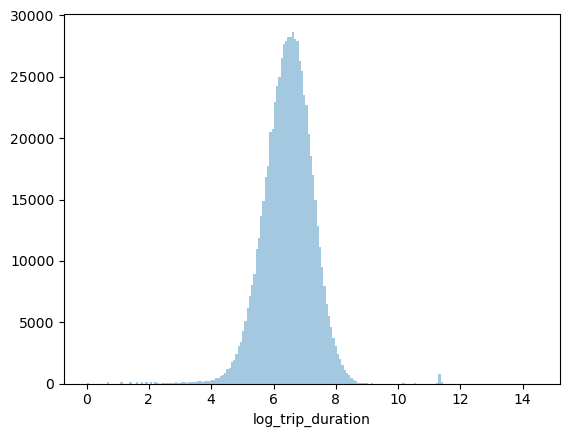

In [9]:
data['log_trip_duration'] = np.log(data['trip_duration'].values)
sns.distplot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

Text(0, 0.5, 'Frequency')

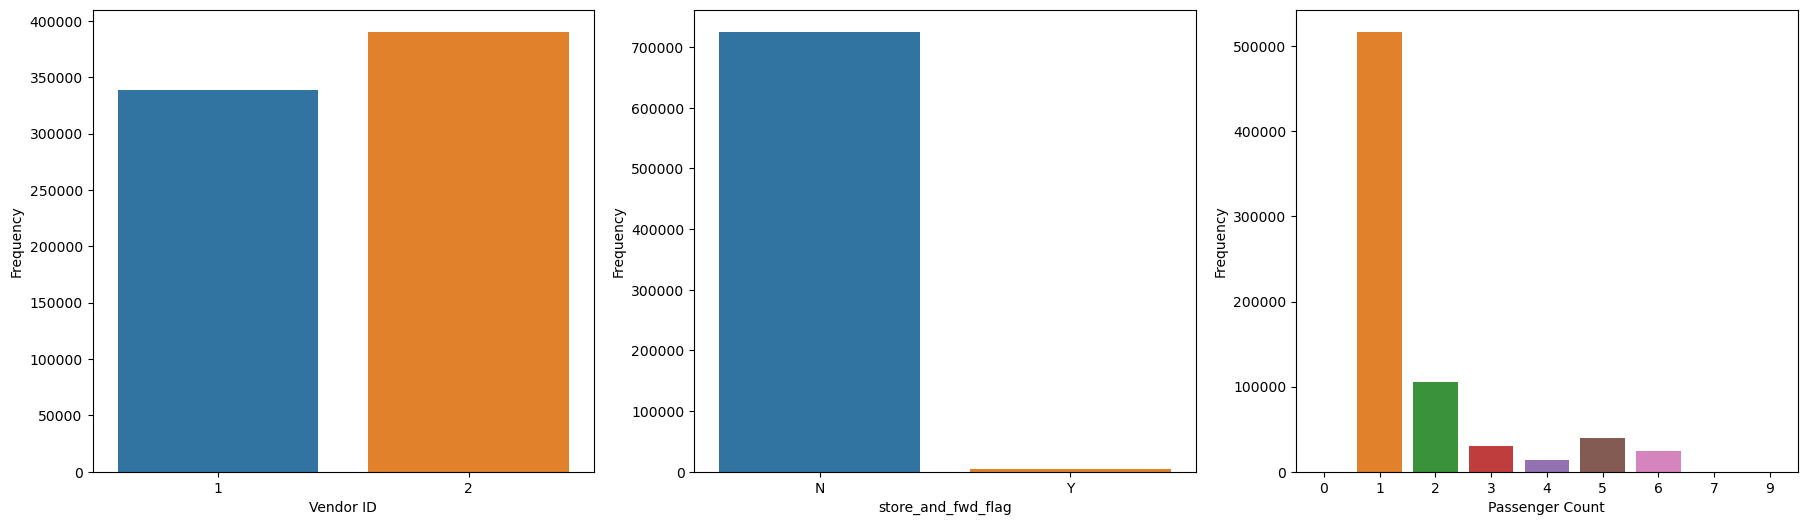

In [10]:
#Univariate Visualization
plt.figure(figsize=(22, 6))

plt.subplot(131)
sns.countplot(data['vendor_id'])
plt.xlabel('Vendor ID')
plt.ylabel('Frequency')


plt.subplot(132)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

plt.subplot(133)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


Text(0, 0.5, 'Total number of pickups')

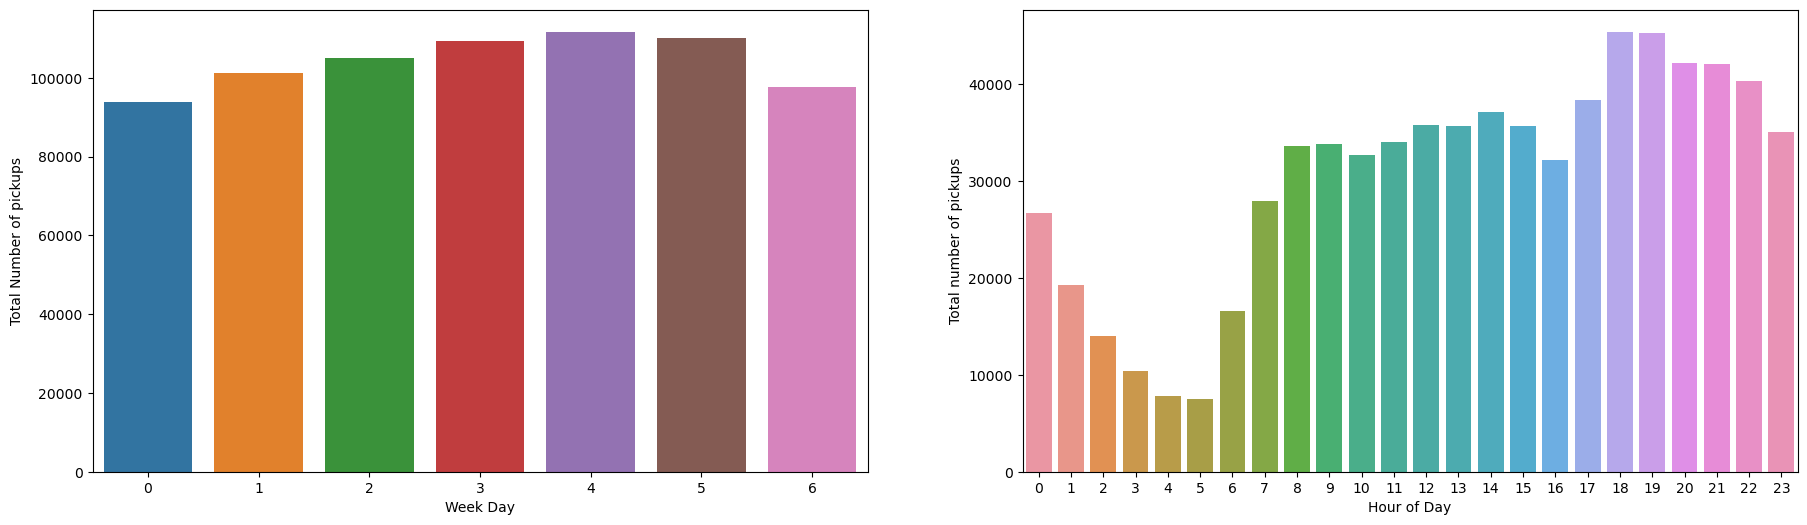

In [11]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour

# Datetime features
plt.figure(figsize=(22, 6))

# Passenger Count
plt.subplot(121)
sns.countplot(data['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sns.countplot(data['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')


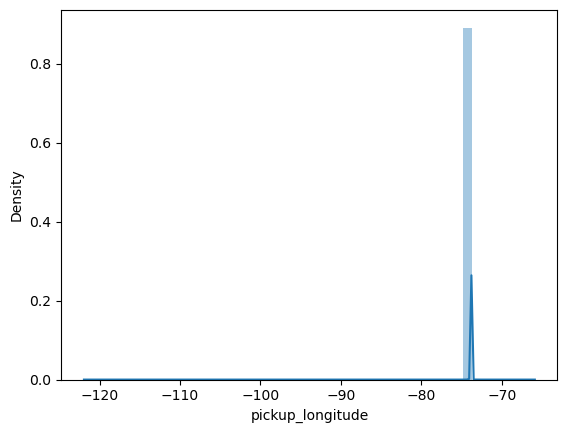

In [12]:
sns.distplot(data['pickup_longitude'])
plt.show()

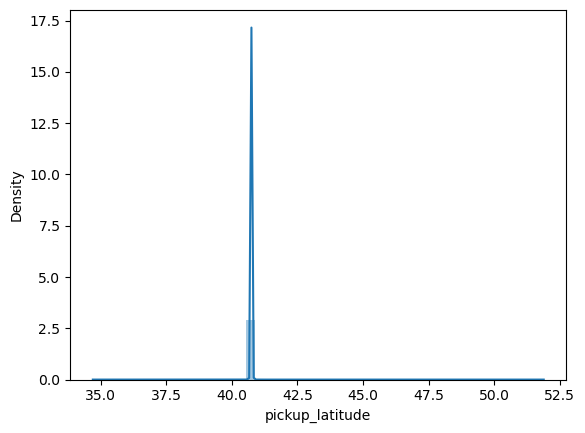

In [13]:
sns.distplot(data['pickup_latitude'])
plt.show()


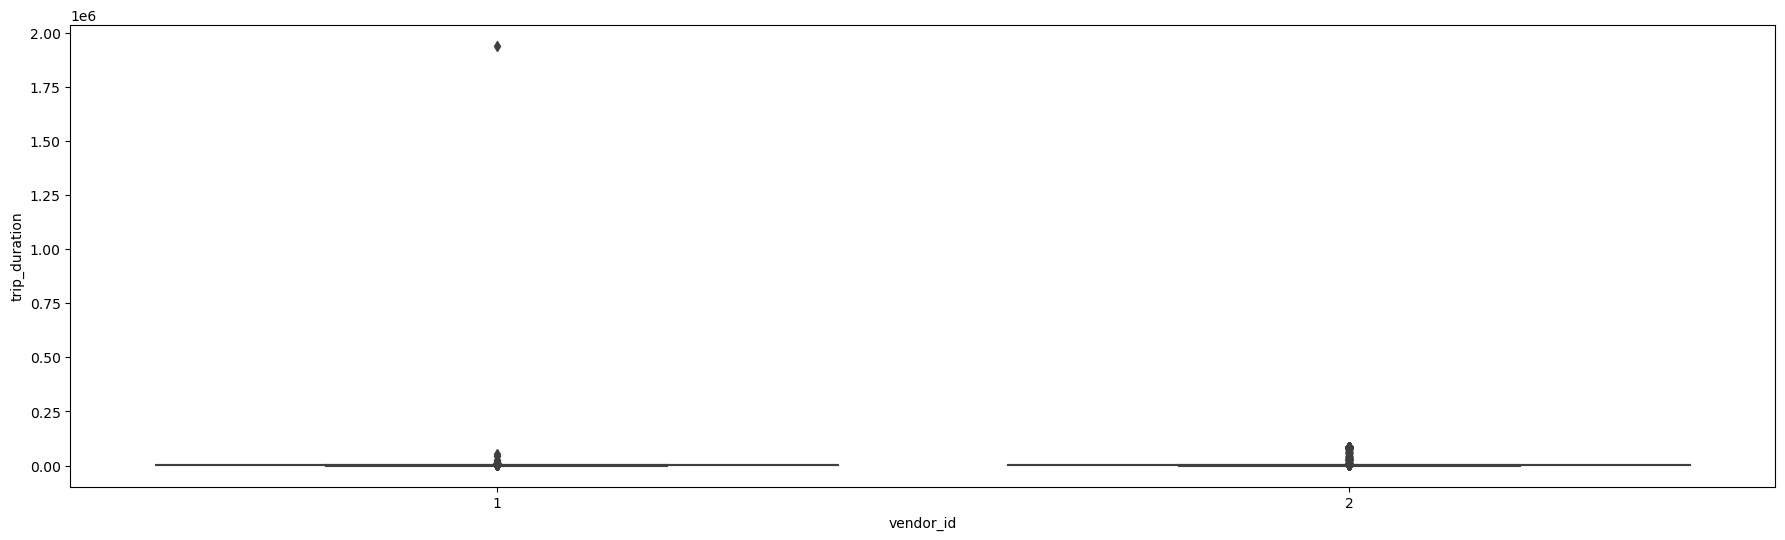

In [15]:
plt.figure(figsize=(22, 6))
sns.boxplot(x="vendor_id", y="trip_duration", data=data)
plt.show()

<AxesSubplot:xlabel='day_of_week', ylabel='trip_duration'>

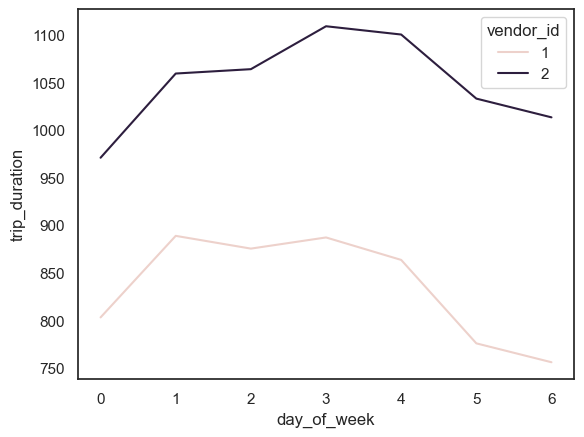

In [16]:

sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot('day_of_week', 'trip_duration', ci = None, hue='vendor_id',
              data=data)


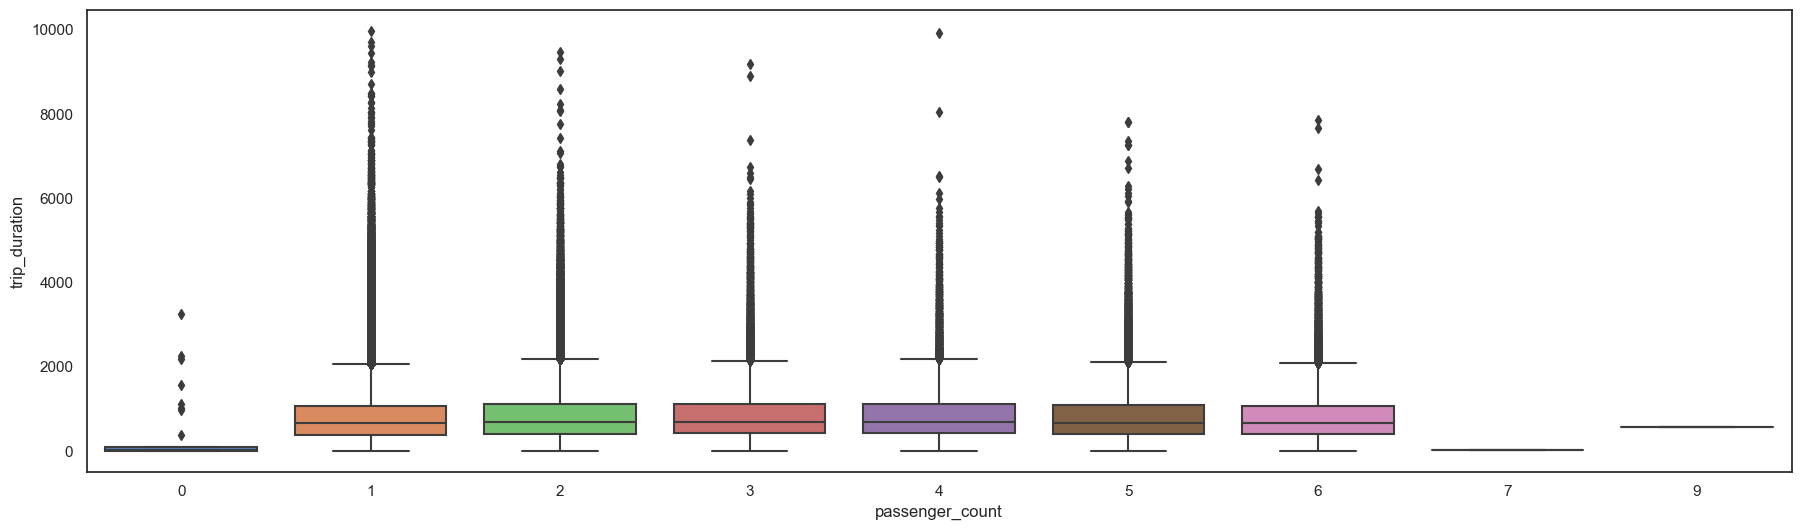

In [17]:

plt.figure(figsize=(22, 6))
data_sub = data[data['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=data_sub)
plt.show()

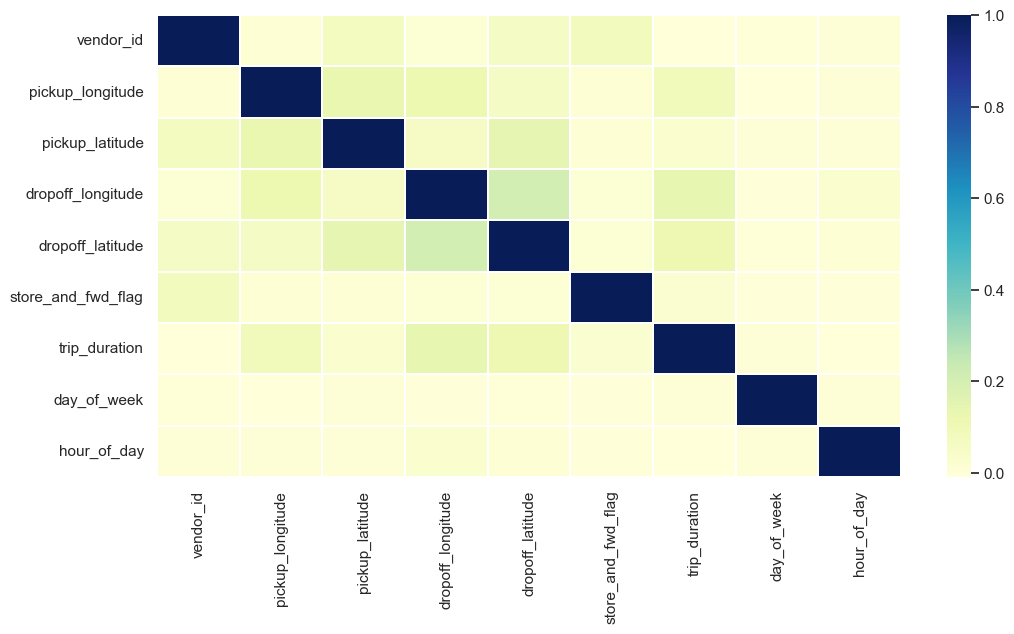

In [18]:
plt.figure(figsize=(12, 6))
data = data.drop(['id', 'pickup_datetime','check_trip_duration', 'dropoff_datetime',
       'passenger_count','log_trip_duration'],
        axis=1)
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")